In [9]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t, norm

### Problem 1 ###

In [161]:
data = pd.read_csv('https://raw.githubusercontent.com/ibrahimjuhas/FinTech545_Fall2023_Ibrahim/main/week05_answers/problem1.csv')

data.head()

,x
0,-0.002665
1,-0.045128
2,0.053635
3,0.010450
4,-0.016284


In [162]:
# fitting a normal distribution to the data

mu, sigma = norm.fit(data['x'])

normal_distribution = norm(mu, sigma)

print('mu = {:.2f},  sigma = {:.2f}'.format(mu, std))

mu = -0.00,  sigma = 0.05


In [163]:
# Fit a generalized t-distribution
df, loc, scale = t.fit(data['x'])

gen_t_distribution = t(df, loc, scale)

# 'df' is the degrees of freedom, 'loc' is the location parameter, and 'scale' is the scale parameter

print(f'Degrees of Freedom (ddf): {df}')
print(f'Location Parameter (loc): {loc}')
print(f'Scale Parameter (scale): {scale}')


Degrees of Freedom (ddf): 4.251095126060646
Location Parameter (loc): -9.372252668219527e-05
Scale Parameter (scale): 0.03643886329896129


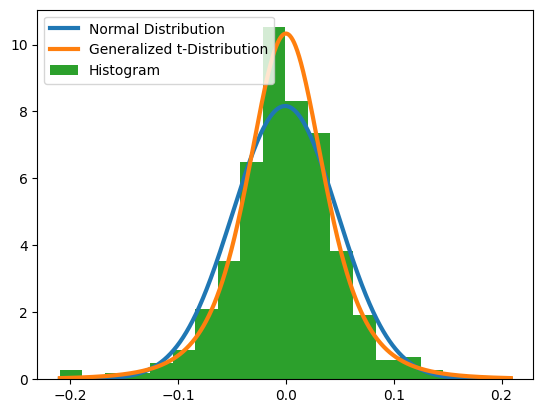

In [164]:
#plotting 

x_values = np.linspace(data['x'].min(), data['x'].max(), 1000)

pdf_normal = normal_distribution.pdf(x_values)
pdf_gen_t = gen_t_distribution.pdf(x_values)

plt.plot(x_values, pdf_normal, label='Normal Distribution', linewidth=3)
plt.plot(x_values, pdf_gen_t, label='Generalized t-Distribution', linewidth=3)

plt.hist(data['x'], bins=20, density=True, label='Histogram')

plt.legend()

plt.show()



In [169]:
params = genpareto.fit(data["x"])
print(params)

(-0.738686850185907, -0.2098271813230157, 0.3092649415619215)


VaR (Normal Distribution): -0.0795
ES (Normal Distribution): -0.0999
VaR (t-Distribution): -0.1943
ES (t-Distribution): 0.7056


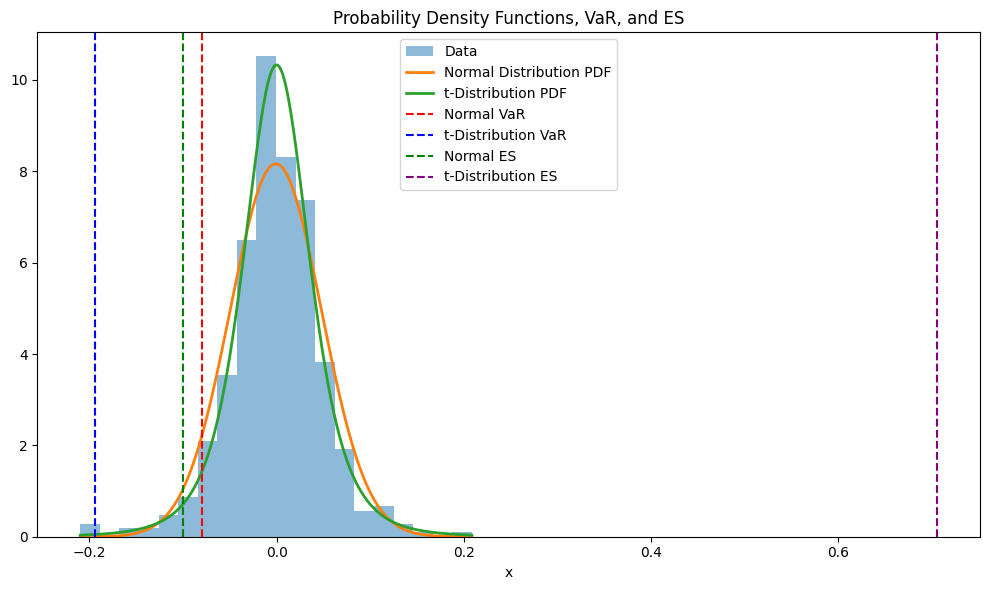

In [166]:
import numpy as np
from scipy.stats import norm, t

# Define parameters

confidence_level = 0.95

mu, sigma = norm.fit(data['x'])

# Calculate VaR and ES for normal distribution
z_score_normal = norm.ppf(1 - (1 - confidence_level))

VaR_normal = -(mu + z_score_normal * sigma)

ES_normal = -(mu + (sigma / (1 - confidence_level)) * norm.pdf(norm.ppf(confidence_level)))

print(f'VaR (Normal Distribution): {VaR_normal:.4f}')
print(f'ES (Normal Distribution): {ES_normal:.4f}')

# calculate VaR and ES for t distribution

params = genpareto.fit(data["x"])
# print(params)
var_t = genpareto.ppf(0.05, *params)
print(f'VaR (t-Distribution): {var_t:.4f}')

ES_t = -(mu+params[1]*genpareto.pdf(var_t, *params))/confidence_level

print(f'ES (t-Distribution): {ES_t:.4f}')


#plotting

# plt.figure(figsize=(10, 6))

x_values = np.linspace(data['x'].min(), data['x'].max(), 1000)

pdf_normal = normal_distribution.pdf(x_values)
pdf_gen_t = gen_t_distribution.pdf(x_values)

fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(data['x'], density=True, bins=20, alpha=0.5, label='Data')



plt.plot(x_values, pdf_normal, label='Normal Distribution PDF', linewidth=2)
plt.plot(x_values, pdf_gen_t, label='t-Distribution PDF', linewidth=2)

plt.axvline(VaR_normal, color='red', linestyle='--', label='Normal VaR')
plt.axvline(var_t, color='blue', linestyle='--', label='t-Distribution VaR')
plt.axvline(ES_normal, color='green', linestyle='--', label='Normal ES')
plt.axvline(ES_t, color='purple', linestyle='--', label='t-Distribution ES')

plt.title('Probability Density Functions, VaR, and ES')
plt.xlabel('x')
plt.legend()

plt.tight_layout()
plt.show()



### Problem 2 ###

In your main repository, create a Library for risk management. Create modules, classes, packages, etc as you see fit. Include all the functionality we have discussed so far in class. Make sure it includes
1. Covariance estimation techniques.
2. Non PSD fixes for correlation matrices
3. Simulation Methods
4. VaR calculation methods (all discussed)
5. ES calculation
Create a test suite and show that each function performs as expected.

In [170]:
portfolio = pd.read_csv('https://raw.githubusercontent.com/ibrahimjuhas/FinTech545_Fall2023_Ibrahim/main/week05_answers/portfolio.csv')

portfolio.head()

,Portfolio,Stock,Holding
0,A,AAPL,158
1,A,MSFT,178
2,A,AMZN,110
3,A,NVDA,54
4,A,GOOGL,69


In [172]:
DailyPrices = pd.read_csv("https://raw.githubusercontent.com/ibrahimjuhas/FinTech545_Fall2023_Ibrahim/main/week05_answers/DailyPrices.csv", index_col=0)

DailyPrices.head()

,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,META,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-01,388.679565,157.028442,257.908386,127.820000,139.243423,109.739998,277.160004,110.550003,282.429993,165.360001,...,282.124664,136.138718,36.036259,123.325203,70.653595,424.766022,158.011505,46.662727,40.990002,249.972107
2022-09-02,384.581177,154.891113,253.609909,127.510002,136.346054,107.849998,270.209991,108.680000,277.670013,160.320007,...,281.791626,134.696564,37.229321,122.039116,69.294113,422.966797,155.602798,46.748875,40.490002,243.384186
2022-09-06,383.130066,153.618668,250.826813,126.110001,134.527710,106.809998,274.420013,107.480003,276.589996,158.539993,...,280.483856,135.834595,36.703716,122.108894,69.422180,419.574921,155.464035,46.155418,40.380001,246.615067
2022-09-07,390.013000,155.040237,255.620483,129.479996,137.056152,109.449997,283.700012,110.480003,281.040009,160.389999,...,285.154480,138.591293,36.408989,126.814598,70.722557,424.726715,158.992813,46.547867,41.470001,251.776749
2022-09-08,392.562256,153.549088,256.046387,129.820007,139.814484,108.379997,289.260010,109.419998,283.339996,162.059998,...,285.852631,140.523956,37.499485,128.828476,72.072182,431.766174,157.099579,47.763493,42.709999,253.882172


In [175]:
import covariance_estimate, non_psd_fixes, simulation_methods, var_allcalc

In [178]:
x = covariance_estimate.exp_weighted_cov(DailyPrices, 0.94)
x

array([[1380.22886475,  722.3072376 , 1798.69149527, ..., -103.22488143,
         178.44878445, -733.63758946],
       [ 722.3072376 ,  399.81027371,  943.38755256, ...,  -50.83805645,
          93.10164865, -373.21452093],
       [1798.69149527,  943.38755256, 2381.64267904, ..., -135.93134809,
         236.75943013, -974.01898421],
       ...,
       [-103.22488143,  -50.83805645, -135.93134809, ...,   11.47863582,
         -14.94926209,   67.43266262],
       [ 178.44878445,   93.10164865,  236.75943013, ...,  -14.94926209,
          25.29223731, -102.44506364],
       [-733.63758946, -373.21452093, -974.01898421, ...,   67.43266262,
        -102.44506364,  465.82693886]])

In [180]:
x = non_psd_fixes.near_psd(x)
x

array([[1380.22886475,  722.3072376 , 1798.69149527, ..., -103.22488143,
         178.44878445, -733.63758946],
       [ 722.3072376 ,  399.81027371,  943.38755256, ...,  -50.83805645,
          93.10164865, -373.21452093],
       [1798.69149527,  943.38755256, 2381.64267904, ..., -135.93134809,
         236.75943013, -974.01898421],
       ...,
       [-103.22488143,  -50.83805645, -135.93134809, ...,   11.47863582,
         -14.94926209,   67.43266262],
       [ 178.44878445,   93.10164865,  236.75943013, ...,  -14.94926209,
          25.29223731, -102.44506364],
       [-733.63758946, -373.21452093, -974.01898421, ...,   67.43266262,
        -102.44506364,  465.82693886]])

In [181]:
a = simulation_methods.chol_psd(x)
a

array([[ 3.71514315e+01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.94422451e+01,  4.67005131e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.84151329e+01,  4.47248200e-01,  6.11698893e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.77849001e+00,  6.81368823e-01, -2.80387276e-01, ...,
         4.08150356e-02,  0.00000000e+00,  0.00000000e+00],
       [ 4.80328152e+00, -6.10117306e-02,  6.92367513e-01, ...,
         4.72162717e-03,  7.69848719e-02,  0.00000000e+00],
       [-1.97472226e+01,  2.29458324e+00, -3.10296854e+00, ...,
        -9.16488816e-03,  7.89883658e-02,  2.27478547e-01]])

In [182]:
y = simulation_methods.direct_simulation(a, 1000)

y

/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/assignment 1/solutions/number2/FinTech545_Fall2023_Ibrahim/week05_answers/simulation_methods.py:23: RuntimeWarning: invalid value encountered in sqrt
  root[i][i] = np.sqrt(temp)


array([[ 9.6814717 , 12.48612924,  5.92907113, ...,  0.1787285 ,
         0.70148039,  0.13371504],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

### Problem 3 ###

Use your repository from #2.
Using Portfolio.csv and DailyPrices.csv. Assume the expected return on all stocks is 0. This file contains the stock holdings of 3 portfolios. You own each of these portfolios.
Fit a Generalized T model to each stock and calculate the VaR and ES of each portfolio as well as your total VaR and ES. Compare the results from this to your VaR form Problem 3 from Week 4.

In [198]:
def VAR(a, alpha=0.05):
    x = np.sort(a)
    n = len(a)
    nup = int(np.ceil(n * alpha))
    ndn = int(np.floor(n * alpha))
    v = 0.5 * (x[nup] + x[ndn])
    return -v

In [221]:
from var_allcalc import VAR as var
import simulation_methods as s

In [234]:
daily_returns = DailyPrices.pct_change().dropna()
returns = returns - np.mean(returns)

returns.head()

,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,META,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-02,-0.011177,-0.014243,-0.017299,-0.003058,-0.021440,-0.017855,-0.025708,-0.017548,-0.017486,-0.031111,...,-0.001813,-0.011226,0.032475,-0.011061,-0.019874,-0.004868,-0.015876,0.001214,-0.012830,-0.026987
2022-09-06,-0.004405,-0.008847,-0.011606,-0.011612,-0.013968,-0.010275,0.014948,-0.011674,-0.004522,-0.011735,...,-0.005273,0.007817,-0.014750,-0.000060,0.001216,-0.008651,-0.001524,-0.013327,-0.003349,0.012643
2022-09-07,0.017333,0.008622,0.018479,0.026090,0.018163,0.024085,0.033185,0.027280,0.015457,0.011037,...,0.016020,0.019662,-0.008662,0.037905,0.018099,0.011646,0.022066,0.007871,0.026361,0.020298
2022-09-08,0.005904,-0.010250,0.001034,0.001994,0.019493,-0.010408,0.018966,-0.010227,0.007552,0.009780,...,0.001816,0.013313,0.029319,0.015248,0.018451,0.015942,-0.012540,0.025483,0.029269,0.007730
2022-09-09,0.014903,0.018207,0.022345,0.025943,0.027745,0.020313,0.035391,0.020936,0.007944,0.043117,...,0.006694,0.016611,0.038142,-0.004811,0.018231,0.025827,0.036089,0.014798,0.004753,-0.000938


In [235]:
def portfolio_price(prices, portfolio):
    pv = []
    for i in portfolio:
        pv.append(prices.iloc[-1][i])
    return pv

In [236]:
# Get the list of stocks in each portfolio
portfolio_A = portfolio[portfolio['Portfolio'] == 'A']['Stock'].tolist()
portfolio_B = portfolio[portfolio['Portfolio'] == 'B']['Stock'].tolist()
portfolio_C = portfolio[portfolio['Portfolio'] == 'C']['Stock'].tolist()
portfolio_t = portfolio['Stock'].tolist()

# Get the number of holdings for each stock in each portfolio
holdings_A = portfolio[portfolio['Portfolio'] == 'A']['Holding'].tolist()
holdings_B = portfolio[portfolio['Portfolio'] == 'B']['Holding'].tolist()
holdings_C = portfolio[portfolio['Portfolio'] == 'C']['Holding'].tolist()
holdings_t = portfolio['Holding'].tolist()

# Get the daily prices for the stocks in each portfolio
portfolio_A_prices = DailyPrices[portfolio_A].values
portfolio_B_prices = DailyPrices[portfolio_B].values
portfolio_C_prices = DailyPrices[portfolio_C].values
portfolio_t_prices = DailyPrices[portfolio_t].values

# Calculate the daily returns for each portfolio
portfolio_A_returns = np.diff(np.log(portfolio_A_prices), axis=0)
portfolio_B_returns = np.diff(np.log(portfolio_B_prices), axis=0)
portfolio_C_returns = np.diff(np.log(portfolio_C_prices), axis=0)
portfolio_t_returns = np.diff(np.log(portfolio_t_prices), axis=0)

In [237]:
portfolio_A_returns.shape

(265, 33)

In [243]:
#simulation
def calculate_t_pValues(port, returns_port, price):
    return_cdf=[]
    par=[]
    returns_port = pd.DataFrame(returns_port)
    for col in returns_port.columns:
        df, loc, scale = t.fit(returns_port[col].values)
        par.append([df,loc,scale])
        return_cdf.append(t.cdf(returns_port[col].values, df=df, loc=loc, scale=scale).tolist())
    return_cdf=pd.DataFrame(return_cdf).T
    spearman_cor=return_cdf.corr(method='spearman')
    sample=pd.DataFrame(s.simulate_pca(spearman_cor, 10000, 0.95)).T

    sample_cdf=[]
    for col in sample.columns:
        sample_cdf.append(norm.cdf(sample[col].values, loc=0, scale=1).tolist())
        
    simu_return=[]
    for i in range(len(sample_cdf)):
        simu_return.append(t.ppf(sample_cdf[i], df=par[i][0], loc=par[i][1], scale=par[i][2]))
    simu_return=np.array(simu_return)
    
    sim_price=(1 + simu_return.T)*price
    pVals = sim_price.dot(port)
    pVals.sort()
    return pVals

In [240]:
def calculate_var(data, mean=0, alpha=0.05):
    return mean - np.quantile(data, alpha)

In [219]:
def calculate_es(data, mean=0, alpha=0.05):
    var = mean - np.quantile(data, alpha)
    return -data[data <= -var].mean()


In [246]:
pv = np.sum(np.array(holdings_A)*np.array(portfolio_price(DailyPrices, portfolio_A)))
VaR = calculate_var(calculate_t_pValues(holdings_A, portfolio_A_returns, portfolio_price(DailyPrices, portfolio_A)), pv)
CVaR = calculate_es(pv-calculate_t_pValues(holdings_A, portfolio_A_returns, portfolio_price(DailyPrices, portfolio_A)), VaR)
print("portfolio A")
print("VaR =", VaR)
print("ES =", CVaR)

Simulating with 23 PC Factors: 95.06 % total variance explained
Simulating with 23 PC Factors: 95.06 % total variance explained
portfolio A
VaR = 19610.758617957355
ES = 46752.40365483138


In [247]:
pv = np.sum(np.array(holdings_C)*np.array(portfolio_price(DailyPrices, portfolio_C)))
VaR = calculate_var(calculate_t_pValues(holdings_C, portfolio_C_returns, portfolio_price(DailyPrices, portfolio_C)), pv)
CVaR = calculate_es(pv-calculate_t_pValues(holdings_C, portfolio_C_returns, portfolio_price(DailyPrices, portfolio_C)), VaR)
print("portfolio C")
print("VaR =", VaR)
print("ES =", CVaR)

Simulating with 26 PC Factors: 95.42 % total variance explained
Simulating with 26 PC Factors: 95.42 % total variance explained
portfolio C
VaR = 25471.554651659215
ES = 63180.311902574664


In [248]:
pv = np.sum(np.array(holdings_t)*np.array(portfolio_price(DailyPrices, portfolio_t)))
VaR = calculate_var(calculate_t_pValues(holdings_t, portfolio_t_returns, portfolio_price(DailyPrices, portfolio_t)), pv)
CVaR = calculate_es(pv-calculate_t_pValues(holdings_t, portfolio_t_returns, portfolio_price(DailyPrices, portfolio_t)), VaR)
print("portfolio total")
print("VaR =", VaR)
print("ES =", CVaR)

Simulating with 62 PC Factors: 95.19 % total variance explained
Simulating with 62 PC Factors: 95.19 % total variance explained
portfolio total
VaR = 55247.26733953692
ES = 138350.1922901589
